In [2]:
!pip install d2l==0.14.4

     |████████████████████████████████| 61kB 1.8MB/s 


epoch 1, loss: 0.243260
epoch 2, loss: 0.122895
epoch 3, loss: 0.070158
epoch 4, loss: 0.055834
epoch 5, loss: 0.052322


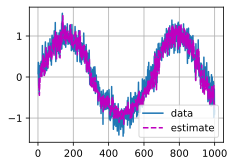

In [8]:
%matplotlib inline
from d2l import tensorflow as d2l
import tensorflow as tf

T = 1000  
time = tf.range(1, T + 1, dtype=tf.float32)
x = tf.sin(0.01 * time) + tf.random.normal([T], 0, 0.2)

tau = 4# 2, 4, 8, 16,90 ,172
features = tf.Variable(tf.zeros((T - tau, tau)))
for i in range(tau):
    features[:, i].assign(x[i: T - tau + i])
labels = tf.reshape(x[tau:], (-1, 1))

batch_size, n_train = 16, 600
train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
                            batch_size, is_train=True)

def get_net():
    net = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='relu'),
                              tf.keras.layers.Dense(1)])
    return net

loss = tf.keras.losses.MeanSquaredError()

def train(net, train_iter, loss, epochs, lr):
    trainer = tf.keras.optimizers.Adam()
    for epoch in range(epochs):
        for X, y in train_iter:
            with tf.GradientTape() as g:
                out = net(X)
                l = loss(y, out) / 2
                params = net.trainable_variables
                grads = g.gradient(l, params)
            trainer.apply_gradients(zip(grads, params))
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

estimates = net(features)
d2l.plot([time, time[tau:]], [d2l.numpy(x), d2l.numpy(estimates)],
legend=['data', 'estimate'])
